# Quick Estimation of Percentiles

Michael Brückner posed an interesting (but debatable) question. Given an unsorted huge array of random numbers x_i, who can you get a reasonable estimate of the x-th percentile in one run over the data (sorting is not possible). You are memory-bounded, so you can only store some constant terms.

The key idea is the following observation. The solution of the optimization problem `min_z sum_i (x_i-z)^2` has a closed form and is given by the average over the data (take the derivative, set it to zero, and rearrange). Interstingly, if you replace the squared loss by an absolute loss `min_z sum_i |x_i-z|` the solution is given by the median (the 50% percentile). We now can also take a stochastic gradient descent approach and optimize the objective by updating the estimate by the (decayed) gradient computed for each example. Hence, this will converge to the median.

Note, that the mean can also be computed by just summing up all values and devide it by the length of the array, however, for the median the array needs to be sorted. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Draw some random data points from a gamma distribution.

In [2]:
n = 100000
data = np.random.gamma(2, 2, n)

Run SGD and show learning trajectory

10th percentile: 1.077 (estimate: 1.091; actual percentile: 0.102)


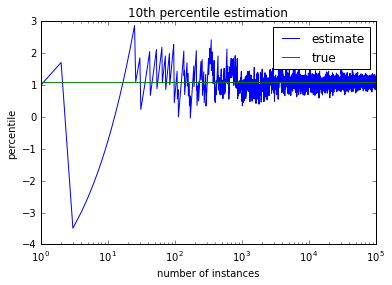

In [3]:
percentile =  10
est = np.zeros(len(data)+1)
for i in range(len(data)):
    grad = np.sign(data[i]-est[i])
    if grad < 0:
        grad *= (100./percentile-1)
    rate = 1./np.sqrt(i+1.)
    est[i+1] = est[i] + rate * grad
    
true_percentile = np.percentile(data, percentile)
print "{}th percentile: {:3.3f} (estimate: {:3.3f}; actual percentile: {:3.3f})".format(
       percentile,true_percentile,  est[-1] , np.mean(data<est[-1])
)
plt.semilogx(est)
plt.semilogx([true_percentile] * n)
plt.title("{}th percentile estimation".format(percentile))
plt.xlabel('number of instances')
plt.ylabel('percentile')
plt.legend(['estimate', 'true']);